<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:60px;background-color:#C20E83;overflow:hidden;font-weight:800">Surat City Flats</div>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/flats-uncleaned-dataset/surat_uncleaned.csv


## <b><div style='padding:15px;background-color:#C20E83;color:white;border-radius:40px;font-size:110%;text-align: center'>1  |  About Dataset</div></b>

**The dataset provided appears to be a collection of real estate listings scraped from MagicBricks for properties in Surat.**

**This dataset contains various details about residential properties available for sale in Surat. The information provided is structured into several columns, each representing a different attribute of the property listing.**

**useful for education purposes**

## <b><div style='padding:15px;background-color:#C20E83;color:white;border-radius:40px;font-size:110%;text-align: center'>2  |  Import Libraries</div></b>

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import os 
import plotly.express as px

import plotly.graph_objects as go
import plotly.offline as pyo 
import plotly.io as pio
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import RepeatedKFold
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

## <b><div style='padding:15px;background-color:#C20E83;color:white;border-radius:40px;font-size:110%;text-align: center'>3  |  Download Dataset</div></b>

In [3]:
file = "/kaggle/input/flats-uncleaned-dataset/surat_uncleaned.csv"
df = pd.read_csv(file)
df.head()

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"Luxury project with basement parking, Solar ro...","₹2,891 per sqft",₹33.8 Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,2 And 3 BHK Luxurious Flat for Sell In New Alt...,"₹3,551 per sqft",₹45.4 Lac
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,This affordable 2 BHK flat is situated along a...,"₹3,800 per sqft",₹44.6 Lac
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,New Property,Ready to Move,6 out of 14,Unfurnished,East,2 BHK Flat For sell IN Jahangirabad Prime Loca...,"₹3,966 per sqft",₹47 Lac
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,2,2,"Multistorey Apartment for Sale in Palanpur, Su...","₹3,600 per sqft",₹45 Lac


## <b><div style='padding:15px;background-color:#C20E83;color:white;border-radius:40px;font-size:110%;text-align: center'>4  |  Inspecting and Cleaning Dataframe Structure</div></b>

In [4]:
# Check Dataset

print('### 5 sample ###','\n')
df.sample(5)

### 5 sample ### 



,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price
4125,4 BHK Apartment for Sale in VIP Road Surat,Super Area,4000 sqft,New Property,Poss. by Dec '24,4 out of 12,Unfurnished,East,NaN,"₹7,600 per sqft",₹3.04 Cr
2159,"3 BHK Apartment for Sale in Jolly Residency, V...",Super Area,1700 sqft,Jolly Residency,Ready to Move,Resale,NaN,NaN,NaN,"₹5,059 per sqft",₹86 Lac
2412,3 BHK Apartment for Sale in Pal Surat,Super Area,1872 sqft,Unfurnished,5 out of 14,New Property,East,"Garden/Park, Main Road",NO BROKERAGE ON THIS PROPERTY. This building i...,"₹4,541 per sqft",₹85 Lac
4285,"4 BHK Apartment for Sale in Sangini Evoq, Vesu...",Super Area,3800 sqft,Resale,Ready to Move,12 out of 19,Unfurnished,East,"A beautiful 4 bhk apartment in Vesu, Surat. It...","₹7,474 per sqft",₹2.84 Cr
1221,Office Space for Sale in Vesu Surat,Super Area,1305 sqft,New Property,Poss. by Aug '25,5 out of 10,"2 Covered,",2,Invest in Your Future PreBook Your Commercial ...,"₹3,379 per sqft",₹44.1 Lac


In [5]:
# Check Dataframe information

print('### Dataframe information ###','\n')
df.info()

### Dataframe information ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4525 entries, 0 to 4524
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   property_name   4525 non-null   object
 1   areaWithType    4525 non-null   object
 2   square_feet     4525 non-null   object
 3   transaction     4421 non-null   object
 4   status          4524 non-null   object
 5   floor           4480 non-null   object
 6   furnishing      4185 non-null   object
 7   facing          3936 non-null   object
 8   description     3154 non-null   object
 9   price_per_sqft  4157 non-null   object
 10  price           4525 non-null   object
dtypes: object(11)
memory usage: 389.0+ KB


<div class="alert alert-block alert-info" style="background-color:#CDFCDC;color:#C20E83;border-color:black;width:80%;margin: auto;text-align: center;"><b>Comment:</b> We can see that all columns are of type object.</div>

In [6]:
# Check duplicate data

print("Number of duplicates: " + str(df.duplicated().sum()))

Number of duplicates: 109


<div class="alert alert-block alert-info" style="background-color:#CDFCDC;color:#C20E83;border-color:black;width:80%;margin: auto;text-align: center;"><b>Comment:</b> Let's delete the duplicate data.</div>

In [7]:
# dropping duplicate values
df.drop_duplicates(keep=False,inplace=True)

In [8]:
# Null Data

print('### Total Null Data in DataFrame ###','\n')
df.isnull().sum()

### Total Null Data in DataFrame ### 



property_name        0
areaWithType         0
square_feet          0
transaction        102
status               1
floor               45
furnishing         322
facing             537
description       1291
price_per_sqft     348
price                0
dtype: int64

In [9]:
# Exclude columns that have many NaN and will not be necessary for our analysis.

df.drop(["furnishing", "facing", "description"], axis=1, inplace=True)


In [10]:
df.describe().T

,count,unique,top,freq
property_name,4307,1941,3 BHK Apartment for Sale in Vesu Surat,87
areaWithType,4307,6,Super Area,2485
square_feet,4307,1379,1000 sqft,71
transaction,4205,38,Resale,2061
status,4306,135,Ready to Move,2890
floor,4262,222,Resale,389
price_per_sqft,3959,2101,"₹5,000 per sqft",58
price,4307,841,Call for Price,171


In [11]:
df['square_feet'].unique()

array(['644 sqft', '1278 sqft', '1173 sqft', ..., '2545 sqft',
       '5175 sqft', '2620 sqft'], dtype=object)

In [12]:
# Clearing column 'square_feet'

df['square_feet'] = df['square_feet'].astype(str).str[:-5]
df.replace({'R':'', 'Rea':'',',': '', 'eady to':'', '84 g':''}, regex=True,  inplace=True)
df["square_feet"] = pd.to_numeric(df["square_feet"])
df['square_feet'].unique()

array([ 644., 1278., 1173., ..., 2545., 5175., 2620.])

In [13]:
# Clearing column 'price_per_sqft'

df['price_per_sqft'].unique()


array(['₹2891 per sqft ', '₹3551 per sqft ', '₹3800 per sqft ', ...,
       '₹8512 per sqft ', '₹8200 per sqft ', '₹5756 per sqft '],
      dtype=object)

In [14]:
df['price_per_sqft'] = df['price_per_sqft'].astype(str).str[1:-10]
df['price_per_sqft'].replace(to_replace={',':''}, inplace=True)
df["price_per_sqft"] = pd.to_numeric(df["price_per_sqft"])

df['price_per_sqft'].unique()

array([2891., 3551., 3800., ..., 8512., 8200., 5756.])

In [15]:
# Clearing column 'price'

df['price'] = df['price'].astype(str).str[1:-4]
df['price'].replace(to_replace={'all for P':'', 'll f':''}, inplace=True)
df["price"] = pd.to_numeric(df["price"])


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4307 entries, 0 to 4524
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   property_name   4307 non-null   object 
 1   areaWithType    4307 non-null   object 
 2   square_feet     4300 non-null   float64
 3   transaction     4205 non-null   object 
 4   status          4306 non-null   object 
 5   floor           4262 non-null   object 
 6   price_per_sqft  3959 non-null   float64
 7   price           4136 non-null   float64
dtypes: float64(3), object(5)
memory usage: 302.8+ KB


In [17]:
# Transform the other object columns into numeric ones.

# Import label encoder
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

objList = df.select_dtypes(include = "object").columns

for obj in objList:
    df[obj] = lb.fit_transform(df[obj].astype(str))

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4307 entries, 0 to 4524
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   property_name   4307 non-null   int64  
 1   areaWithType    4307 non-null   int64  
 2   square_feet     4300 non-null   float64
 3   transaction     4307 non-null   int64  
 4   status          4307 non-null   int64  
 5   floor           4307 non-null   int64  
 6   price_per_sqft  3959 non-null   float64
 7   price           4136 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 302.8 KB


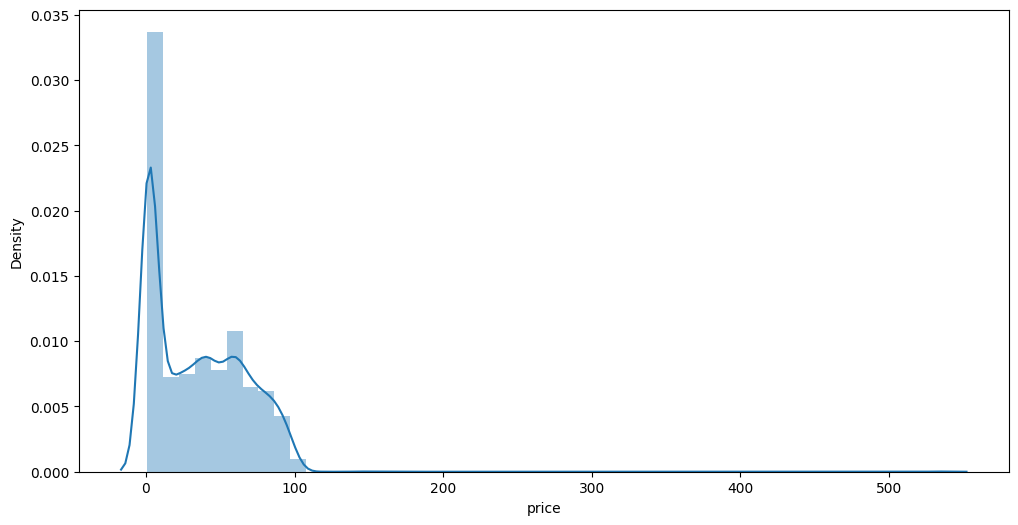

In [19]:
# View the Target column - 'price'

f, ax = plt.subplots(figsize=(12, 6))
sns.distplot(df.get("price"), bins = 50, kde=True)

plt.show()

<div class="alert alert-block alert-info" style="background-color:#CDFCDC;color:#C20E83;border-color:black;width:80%;margin: auto;text-align: center;"><b>Comment:</b> 
We can see that there are many values close to 0 and also outliers. .</div>

**Let's create a new column for 'price' to check if the current column is correct.
The value of the 'price' column must be the result of multiplying column 'square_feet' with column 'price_per_sqft'. Finally divide by 100000 to transform into 'Lac'. This unit is used in this Dataset. One 'Lac' is equivalent to one hundred thousand.**

In [20]:
# New column 'Price'
df['Price'] = (df['square_feet'] * df['price_per_sqft'] / 100000).round(2)

In [21]:
df.head()

,property_name,areaWithType,square_feet,transaction,status,floor,price_per_sqft,price,Price
0,687,1,644.0,23,127,115,2891.0,33.8,18.62
1,640,4,1278.0,23,106,134,3551.0,45.4,45.38
2,798,4,1173.0,37,0,118,3800.0,44.6,44.57
3,725,1,700.0,23,0,134,3966.0,47.0,27.76
4,795,4,1250.0,25,91,213,3600.0,45.0,45.00


**We can confirm that there are wrong values ​​in the old 'price' column. Let's delete it.**

In [22]:
df.drop(["price"], axis=1, inplace=True)

In [23]:
# Null Data

print('### Total Null Data in DataFrame ###','\n')
df.isnull().sum()

### Total Null Data in DataFrame ### 



property_name       0
areaWithType        0
square_feet         7
transaction         0
status              0
floor               0
price_per_sqft    348
Price             349
dtype: int64

In [24]:
#dropping the rows having NaN values
df = df.dropna()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3958 entries, 0 to 4517
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   property_name   3958 non-null   int64  
 1   areaWithType    3958 non-null   int64  
 2   square_feet     3958 non-null   float64
 3   transaction     3958 non-null   int64  
 4   status          3958 non-null   int64  
 5   floor           3958 non-null   int64  
 6   price_per_sqft  3958 non-null   float64
 7   Price           3958 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 278.3 KB


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
property_name,3958.0,1041.832744,534.067382,0.00,636.2500,1156.0,1466.0000,1940.00
areaWithType,3958.0,2.849166,1.436989,0.00,1.0000,4.0,4.0000,4.00
square_feet,3958.0,2109.340829,10068.031853,1.00,803.2500,1290.0,2063.0000,315200.00
transaction,3958.0,30.385548,7.745015,0.00,23.0000,33.0,37.0000,38.00
status,3958.0,35.110915,50.495068,0.00,0.0000,0.0,96.7500,134.00
floor,3958.0,130.415361,62.241630,0.00,93.0000,133.0,184.0000,222.00
price_per_sqft,3958.0,9451.000505,198812.531881,1.00,3644.7500,4681.0,6199.5000,12500000.00
Price,3958.0,102.708095,164.627888,0.05,33.4225,60.0,111.7025,4100.19


<div class="alert alert-block alert-info" style="background-color:#CDFCDC;color:#C20E83;border-color:black;width:80%;margin: auto;text-align: center;"><b>Comment:</b> 
Using the standard deviation (std) I conclude that there are outliers in the dataset. Let's exclude them. .</div>

In [27]:
# Identify number of columns by type

numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
categorical_features = [feature for feature in df.columns if feature not in numerical_features]
binary_categorical_features = [feature for feature in categorical_features if len(df[feature].unique()) <=3]
print("Numerical Features Count {}".format(len(numerical_features)))
print("Discrete features Count {}".format(len(discrete_features)))
print("Continuous features Count {}".format(len(continuous_features)))
print("Categorical features Count {}".format(len(categorical_features)))
print("Binary Categorical features Count {}".format(len(binary_categorical_features)))

Numerical Features Count 8
Discrete features Count 1
Continuous features Count 7
Categorical features Count 0
Binary Categorical features Count 0


In [28]:
outliers_features = [feature for feature in continuous_features]
print(outliers_features)

['property_name', 'square_feet', 'transaction', 'status', 'floor', 'price_per_sqft', 'Price']


In [29]:
# Delete outliers

def plot_boxplot(df, continuous_features):
    # create copy of dataframe
    data = df[continuous_features].copy()
    # Create subplots 
    fig, axes = plt.subplots(nrows=len(data.columns)//2, ncols=2,figsize=(8,8))
    fig.subplots_adjust(hspace=0.7)
    
    # set fontdict
    font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }
    
    # Generate distplot
    for ax, feature in zip(axes.flatten(), data.columns):
        sns.boxplot(data[feature],ax=ax)
        ax.set_title(f'Analysis of {feature}', fontdict=font)
    plt.show()

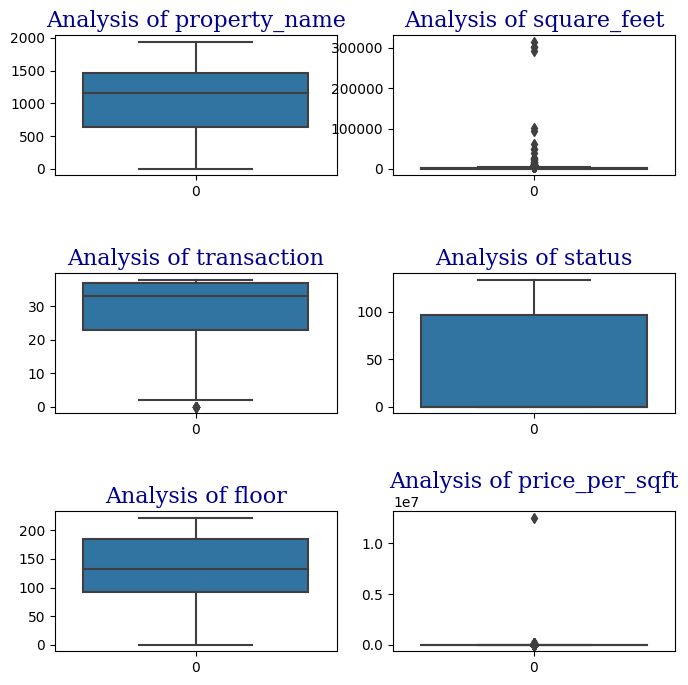

In [30]:
plot_boxplot(df, continuous_features)

In [31]:
# Remove outliers

def remove_outliers(df,outliers_features):
       
    data = df.copy()
    
    for feature in data[outliers_features].columns:
        Q3 = data[feature].quantile(0.75)
        Q1 = data[feature].quantile(0.25)
        IQR = Q3 - Q1
        lower_limit = round(Q1 - 1.5 * IQR)
        upper_limit = round(Q3 + 1.5 * IQR)
        data.loc[data[feature]>= upper_limit,feature] = upper_limit
        data.loc[data[feature]<=lower_limit,feature] = lower_limit
        data = data[(data[feature] < upper_limit) & (data[feature] > lower_limit)]
    return data

In [32]:
df = remove_outliers(df,outliers_features)

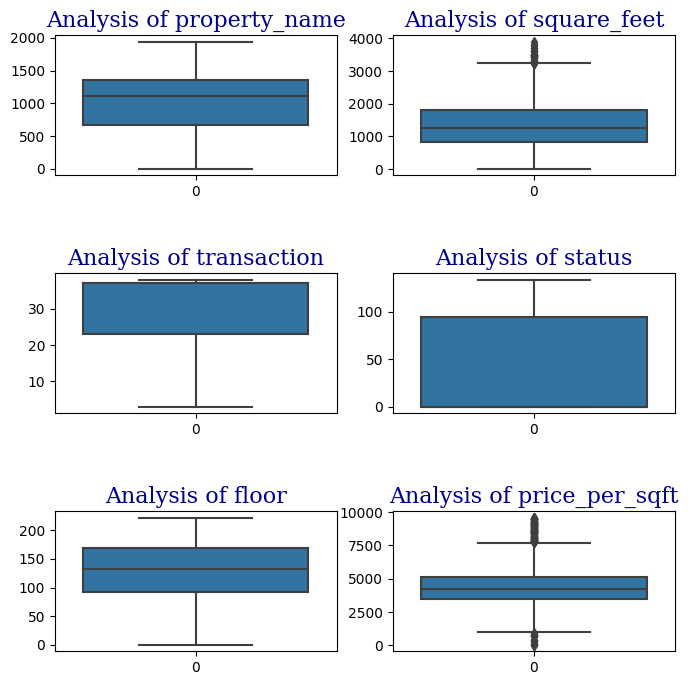

In [33]:
plot_boxplot(df, outliers_features)

## <b><div style='padding:15px;background-color:#C20E83;color:white;border-radius:40px;font-size:110%;text-align: center'>5  |  EDA</div></b>

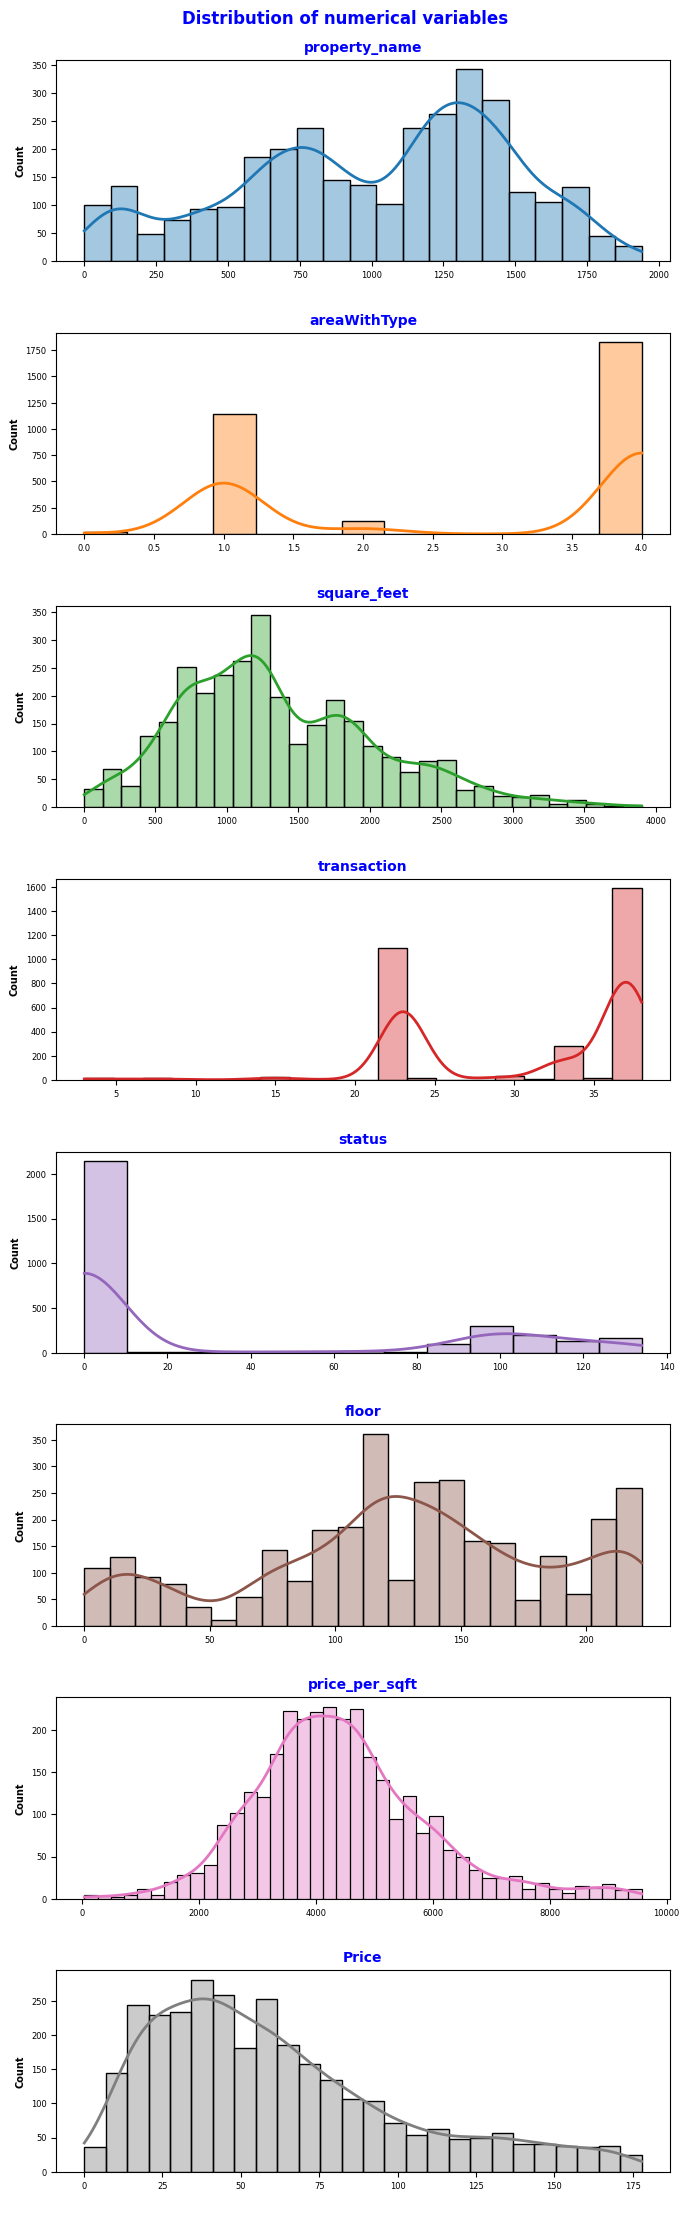

In [34]:
# Numerical variables:

fig,axes = plt.subplots(9, 1, figsize = (7, 25))
axes = axes.flat

for i, num_col in enumerate(numerical_features):
  sns.histplot(df,
               x = num_col,
               stat = 'count',
               kde = True,
               color = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
               line_kws = {'linewidth': 2},
               alpha = 0.4,
               ax = axes[i])

  axes[i].set_xlabel(" ")
  axes[i].set_ylabel("Count", fontsize = 7, fontweight = 'bold', color = 'black')
  axes[i].set_title(num_col, fontsize = 10, fontweight = 'bold', color = 'blue')
  axes[i].tick_params(labelsize = 6)


fig.delaxes(axes[8])
fig.suptitle('Distribution of numerical variables', fontsize = 12, fontweight = 'bold', color = 'blue')
fig.tight_layout()
fig.subplots_adjust(top = 0.96)
fig.show()

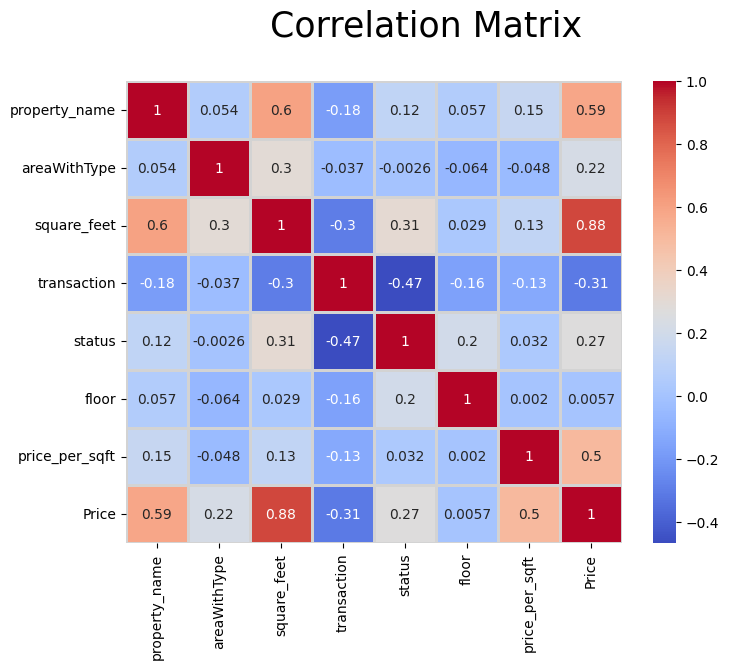

In [35]:
# Correlation matrix of numeric columns

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=2, linecolor='lightgrey')
plt.suptitle('Correlation Matrix', fontsize=25, y=1)
plt.show()

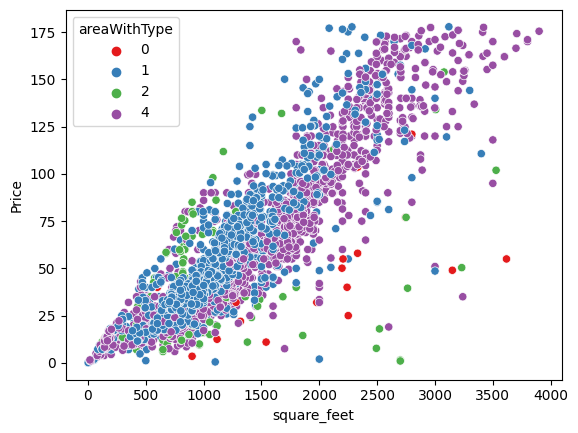

In [36]:
sns.scatterplot(data=df, x="square_feet", y="Price", hue="areaWithType", palette="Set1")
plt.show()

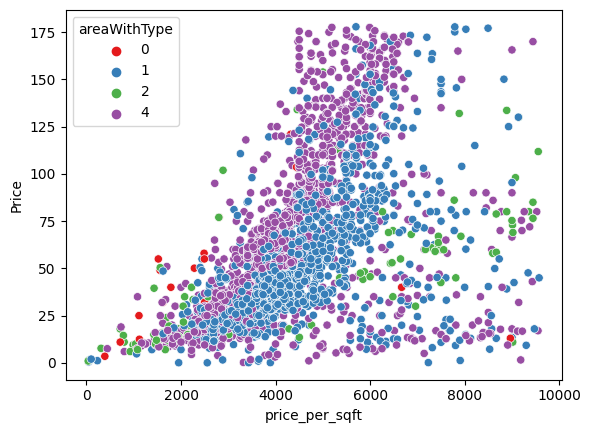

In [37]:
sns.scatterplot(data=df, x="price_per_sqft", y="Price", hue="areaWithType", palette="Set1")
plt.show()

## <b><div style='padding:15px;background-color:#C20E83;color:white;border-radius:40px;font-size:110%;text-align: center'>6  |  CatBoostRegressor</div></b>

In [38]:
# Prepare training data for the machine learning model
# Define independent variables
ind_col = [col for col in df.columns if col!='Price']
# Define dependent variable
dep_col = 'Price'

X = df[ind_col]
y = df[dep_col]

In [39]:
from sklearn.model_selection import train_test_split

# Divide the data set into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [40]:
from sklearn.preprocessing import StandardScaler

# Features normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
# CatBoostRegressor

catboost_model = CatBoostRegressor(verbose=False)
catboost_model.fit(X_train, y_train)
preds = catboost_model.predict(X_train)
acc_catboost_model = sklearn.metrics.r2_score(y_train,preds)
print('R2 Score: ', acc_catboost_model)

R2 Score:  0.999842703461199


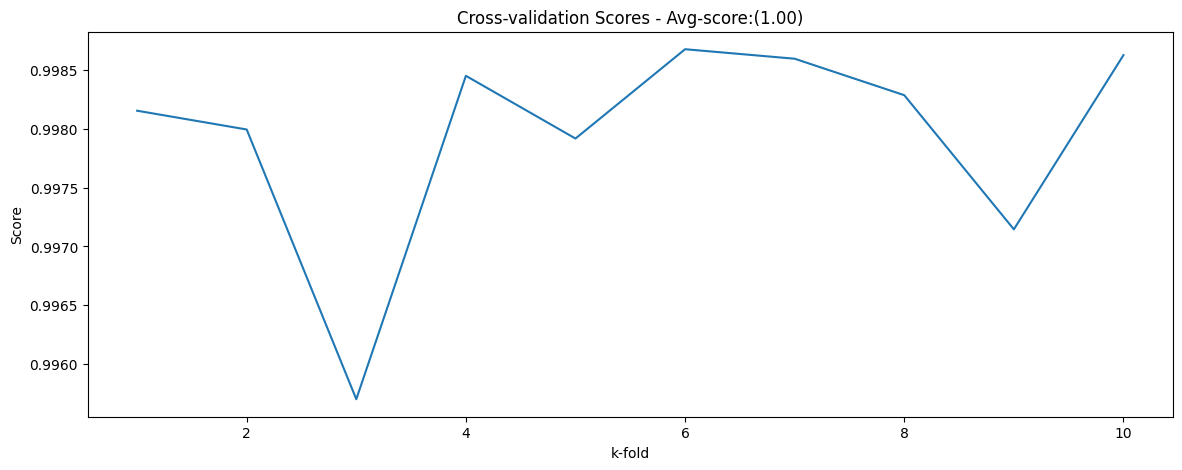

In [42]:
 # cross-validations scores - catboost_model
    
scores = cross_val_score(catboost_model, X_train, y_train, cv=10, scoring='r2', n_jobs=-1)
kfolds = list(range(1, 11))

# plots
plt.figure(figsize=(14, 5))
sns.lineplot(x=kfolds, y=scores)
plt.xlabel("k-fold")
plt.ylabel("Score")
plt.title("Cross-validation Scores - Avg-score:(%.2f)" %(np.mean(scores)))
plt.show()

In [43]:
# Residual catboost_model

predicted = cross_val_predict(catboost_model, X_train, y_train, cv=10, n_jobs=-1)
residual = y_train - predicted

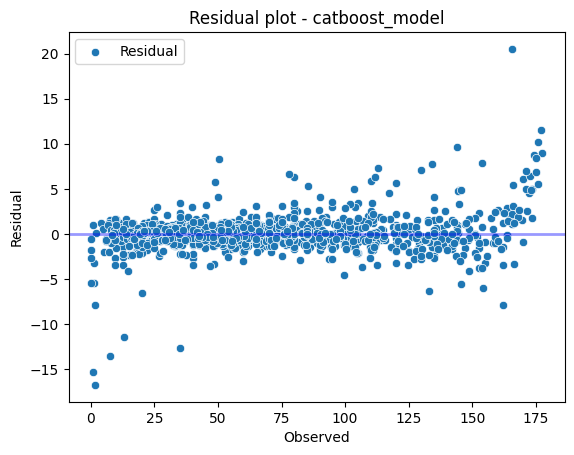

In [44]:
# Analysis of predictions using residual plot

sns.scatterplot(x=y_train, y=residual, label='Residual')
plt.axhline(lw=2, color='blue', alpha=0.4)
plt.xlabel("Observed")
plt.ylabel("Residual")
plt.title("Residual plot - catboost_model")
plt.show()

In [45]:
# Accuracy com cross_validate - CatBoostRegressor

from sklearn.model_selection import cross_validate

SEED = 123
np.random.seed(SEED)

modelo = CatBoostRegressor(verbose=False)
results = cross_validate(modelo, X_train, y_train, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [99.62, 99.97]


## <b><div style='padding:15px;background-color:#C20E83;color:white;border-radius:40px;font-size:110%;text-align: center'>If you liked it, please upvote. Thank you very much.</div></b>